In [1]:
# check whether the distribution of parameters are good
import os, sys, subprocess, time, toml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# visualize some parameters to check whether parameters are correctly generated

num_init = 400
nparam = 17
params = np.nan * np.zeros([num_init, nparam])

for i in range(num_init):
    file = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_0_MOASMOcalib/param_sets/paramset_iter0_trial{i}.pkl'
    df = pd.read_pickle(file)
    va = df['Value'].values
    for j in range(nparam):
        params[i, j]=np.mean(va[j])




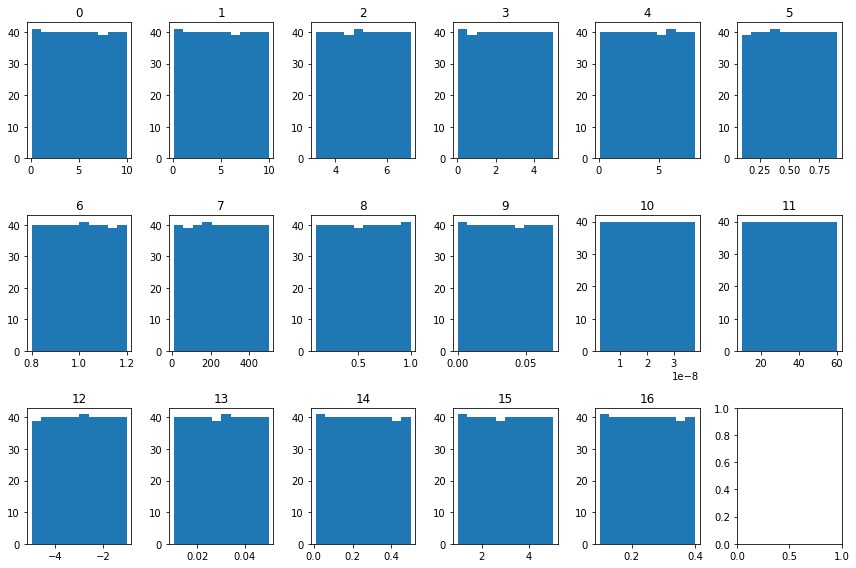

In [4]:
fig, axs = plt.subplots(3, 6, figsize=[12, 8])
axs = axs.flatten()

for i in range(nparam):
    ax = axs[i]
    ax.hist(params[:,i])
    ax.set_title(i)
        
plt.tight_layout()
plt.show()

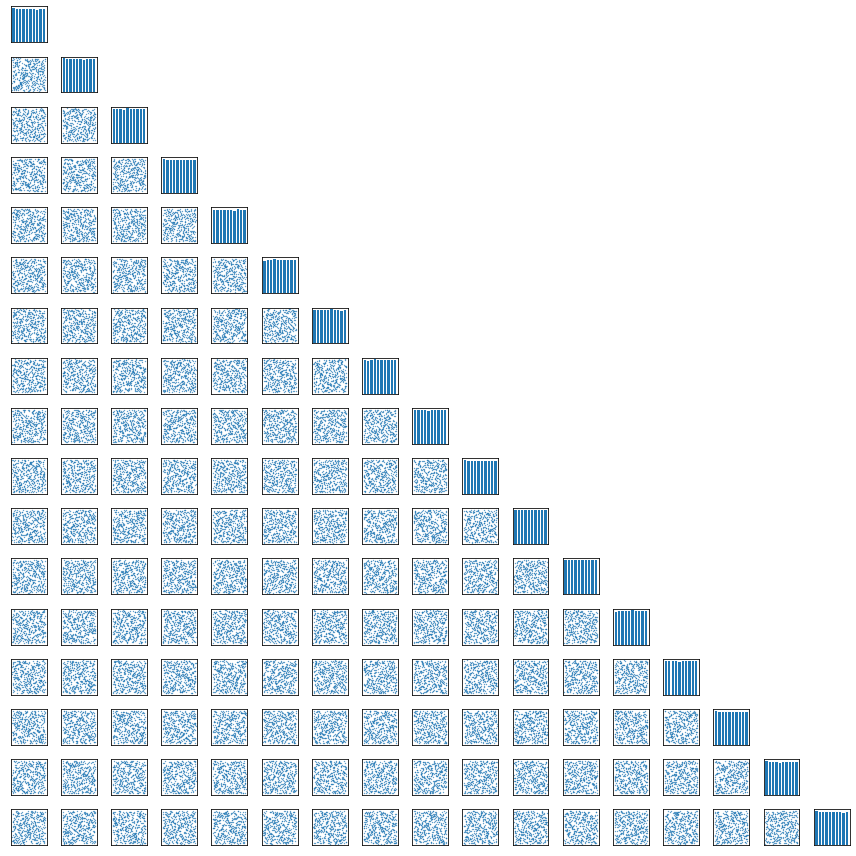

In [5]:
fig, axs = plt.subplots(nparam, nparam, figsize=[12, 12])

for i in range(nparam):
    for j in range(nparam):
        ax = axs[i, j]
        
        if j>i:
            ax.axis('off')
            
        elif j==i:
            ax.hist(params[:,i], rwidth=0.7)
            
            # Hide X and Y axes label marks
            ax.xaxis.set_tick_params(labelbottom=False)
            ax.yaxis.set_tick_params(labelleft=False)

            # Hide X and Y axes tick marks
            ax.set_xticks([])
            ax.set_yticks([])
            
        else:
        
            ax.scatter(params[:,i], params[:,j], 0.1)

            # Hide X and Y axes label marks
            ax.xaxis.set_tick_params(labelbottom=False)
            ax.yaxis.set_tick_params(labelleft=False)

            # Hide X and Y axes tick marks
            ax.set_xticks([])
            ax.set_yticks([])
        
plt.tight_layout()
plt.show()